# Trabajo de Inteligencia Colectiva

<h3>Con el fin de darle una orientación al trabajo seguiremos los siguientes pasos:</h3>
<ol>
<li>  <p>**Introducción**</p> </li>
<li>  <p>**Descripción del Método utilizado**</p>  </li>
<li>  <p>**Descripción del conjunto de datos**</p>  </li>
<li>  <p>**Análisis del conjunto de datos**</p>  </li>
<li>  <p>**Conclusión de las recomendaciones**</p> </li>
</ol>

<ol> <li> <p> **Introducción** </p></li> </ol>
==
**¿Que son los Sistemas de Recomendación?** 

**Def:** Un sistema de recomendación es un **sistema inteligente ** que proporciona a los **usuarios** un serie de **sugerencias personalizadas** (recomendaciones) **sobre un determinado tipo de elementos** (items). Los sistemas de recomendación estudian las características de cada usuario y mediante un procesamiento de los datos, encuentra un subconjunto de items que pueden resultar de interés para el usuario.

Los Sistemas de Recomendación, se clasifican en 4 tipos:

<ol>
<li><p>**Filtrado Basado en contenido:** (ejm: Youtube) Las recomendaciones se basan en el conocimiento que se tiene sobre los items qe el usuario ha valorado (ya sea de forma implícita o explícita), y se le recomendarán items similares que le puedan gustar o interesar.</p></li>

<li><p>**Filtrado Demográfico**: Estas recomendaciones se realizan en función de las características de los usuarios (edad, sexo, situación geográfica, profesión, etc).</p></li>

<li><p>**Filtrado Colaborativo:** (ejem: Filmaffinity) El filtrado colaborativo consiste en ver que usuarios son similares al usuario activo (o usuario al que hay que realizarle las recomendaciones) y a continuación,recomendar aquellos items que no han sido votados por el usuario activo y que han resultado bien valorados por los usuarios similares.</p></li>

<li><p>**Filtrado Híbrido:** (ejm: Amazon) Mezclan alguno de los tres filtrados mencionados anteriormente para realizar recomendaciones e incluso lo combinan con alguna otra técnica de inteligencia artificial como pueda ser la lógica borrosa o la computación evolutiva.</p></li>
</ol>


2. Descripción del Método utilizado
==

**Sistemas de Recomendación basado en Filtrado Colaborativo [K-Vecinos (knn)]** 

**Def:** Dentro de los sistemas de recomendación basados en filtrado colaborativo, existen dos clasificaciones que son los basados en memoria y los basados en modelos.

<ol>
<li><p>**Métodos basado en memoria:** Emplean métrias de similaridad para determinar el parecido entre una pareja de usuarios. Para ello calculan los items que han sido votados por ambos usuarios y comparan dichos votos para calcular la similaridad.</p></li>

<li><p>**Métodos basados en modelos:** utilizan la matriz de votaciones para crear un modelo a través del cual establecer el conjunto de usuarios similares al usuario activo. Algunos ejemplos de estos modelos son los clasiﬁcadores bayesianos, las redes neuronales, algoritmos genéticos, sistemas borrosos y la técnica de descomposición matricial basada en la técnica matemática del SVD.</p></li>
</ol>

**Nota:** de entrada nos centraremos en el método basado en memoria.

A continuación vamos a motrar las tres métricas de similaridad propuestas que básicamente lo que hacen es calcular "**las distancias**" que hay entre cada par de usuarios:

* **MSD (Minimum Square Difference)**

$$sim(x,y)  = 1-\frac{1}{\#B_{x,y}} \sum_{i\in I_u}{\left(\frac{r_{x,i}-r_{y,i}}{max-min}\right)^{2}}$$

Siendo $\#B_{x,y}$ el número de productos que ambos usuarios han calificado (y que tiene que ser necesariamente mayor que 0); siendo $r_{x,i}$ y $r_{y,i}$ las calificaciones emitidas por los usuarios $x$ e $y$ respectivamente, y sinedo $max$ y $min$ las calificaciones máximas y mínimas que los usuarios han emitido.
* **Correlación de Pearson**

$$sim(x,y)  = \frac{\sum_{i\in I_u}{\left(r_{x,i}-\overline{r}_x \right)*\left(r_{y,i}-\overline{r}_y \right)} }{\sqrt{ \sum_{i\in B_{x,y}}{\left(r_{x,i}-\overline{r}_x \right)^2 * \sum_{i\in B_{x,y}}}
{\left(r_{y,i}-\overline{r}_y \right)^2 } }}$$

Siendo $\overline{r}_x$ la media de calificación del usuario $x$.

* **Coseno:** Mide la distancia que hay entre dos usuarios en función del ángulo que forman entre ellos.

$$sim(x,y)  = \frac{\sum_{i\in I_u}{r_{x,i}*r_{y,i}} }{\sqrt{ \sum_{i\in B_{x,y}}{r_{x,i}^2}}*\sqrt{ \sum_{i\in B_{x,y}}{r_{y,i}^2}} }$$

3. Descripción del conjunto de datos
==

El conjunto de datos pertenece a la tienda de bebé de Amazon que ofrece desde alimento, hasta mobiliario y juguetes para todo tipo de ocasión, los datos fueron extraidos de la página de **Stanford University**. 

Este conjunto de datos incluye revisiones (calificaciones, texto, votos de ayuda), metadatos del producto (descripciones, información de categoría, precio, marca e imágenes) y enlaces (también vistos / también compró gráficos). 

Link:
(**Página de datos [Amazon][1]**)


[1]: http://jmcauley.ucsd.edu/data/amazon/ "Página de Amazon"


4. Análisis del conjunto de datos
==

**Objetivo:** Recomendar calificaciones de los productos que un usuarios no ha calificado, por medio del método del **Vecino más cercano [K-Vecino (knn)]**.

**Desarrollo:** Este sistema de recomendación se hará en el lenguaje de programación **R** ya que nos brinda herramientas que permiten un gran análisis, en miras a dar una buena recomendación al usuario.

In [5]:
# Cargamos los paquetes necesarios para el análisis
options(warn=-1)
library(recommenderlab)
library(Matrix)
library(lsa)
library(class)
library(ggplot2)

In [6]:
# lectura de datos 
datos <- read.table(file.choose(),header = TRUE, sep = ",")
head(datos)
str(datos)

usuario,item,calificacion
06abj05,B000056J76,3
06abj05,B000056OV0,3
06abj05,B00005BMDX,2
06abj05,B00005JIVI,5
06abj05,B00006966I,1
06abj05,B00008ODBG,2


'data.frame':	811 obs. of  3 variables:
 $ usuario     : Factor w/ 23 levels "06abj05","06abj07",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ item        : Factor w/ 147 levels "B000056J76","B000056OV0",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ calificacion: int  3 3 2 5 1 2 5 1 2 5 ...


In [7]:
# Convertimos los datos al formato adecuado para hacer el análisis
# sr: Sistema de Recomendación
sr <- as(datos, "realRatingMatrix")
sr

23 x 147 rating matrix of class 'realRatingMatrix' with 811 ratings.

In [8]:
# Matriz de similaridad del usuario usando el método de coseno
similarity_users <- similarity(sr[1:6, ], method = "cosine", which = "users")
similarity_users

# Viene del libro:
#similarity_users <- similarity(MovieLense[1:4, ], method = "cosine", which = "users")

                   06abj05   06abj07 102Riley102riley 19WizardofOz  1angelea
06abj07          0.8118267                                                  
102Riley102riley 0.8531276 0.8120321                                        
19WizardofOz     0.7968950 1.0000000        0.6706511                       
1angelea         0.8360090 0.8954347        0.7981714    0.8625819          
1GirlRunner      0.8508372 0.8788627        0.9047792    0.6024752 0.8630585

In [9]:
# Sirve para visualizar la matriz de similaridad de los usuarios completa 
 as.matrix(similarity_users)

# Viene del libro
# as.matrix(similarity_users)

,06abj05,06abj07,102Riley102riley,19WizardofOz,1angelea,1GirlRunner
06abj05,0.0000000,0.8118267,0.8531276,0.7968950,0.8360090,0.8508372
06abj07,0.8118267,0.0000000,0.8120321,1.0000000,0.8954347,0.8788627
102Riley102riley,0.8531276,0.8120321,0.0000000,0.6706511,0.7981714,0.9047792
19WizardofOz,0.7968950,1.0000000,0.6706511,0.0000000,0.8625819,0.6024752
1angelea,0.8360090,0.8954347,0.7981714,0.8625819,0.0000000,0.8630585
1GirlRunner,0.8508372,0.8788627,0.9047792,0.6024752,0.8630585,0.0000000


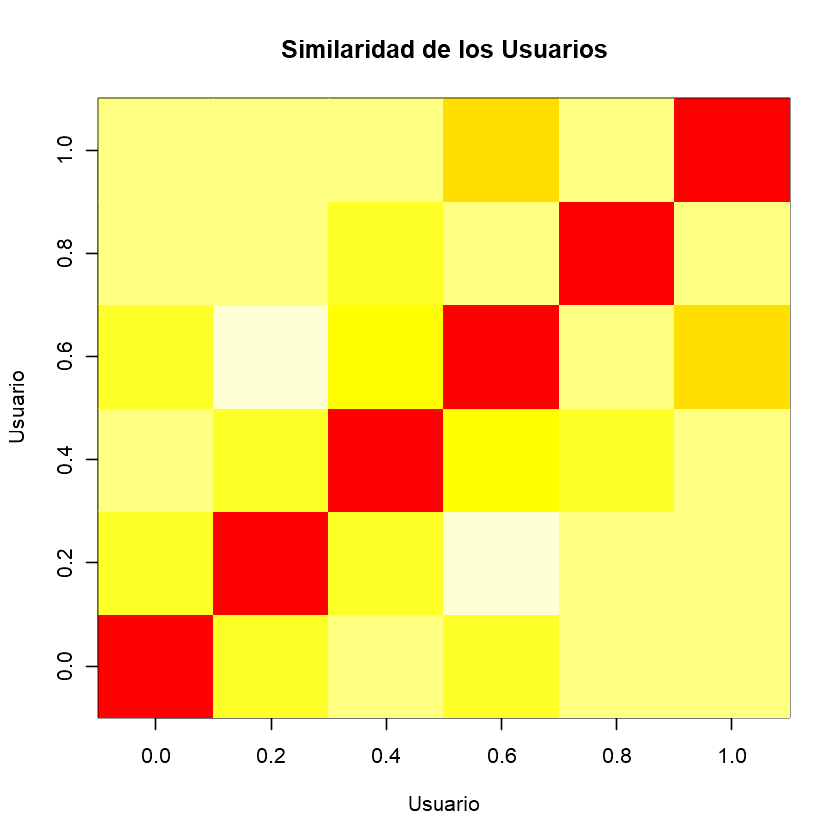

In [10]:
# Sirve par sacar un mapa de calor de la matriz de similaridad de los usuarios
image(as.matrix(similarity_users), main = "Similaridad de los Usuarios", xlab= "Usuario", ylab="Usuario")

# Conclusión: Este gráfico se analiza de la siguiente forma: 
# Entre más rojo este un cuadro significa que hay más similaridad entre los usuarios

# Viene del libro
# image(as.matrix(similarity_users), main = "User similarity")

In [11]:
# Sirve para sacar la matriz de similaridad de los productos
similarity_items <- similarity(sr[, 1:6], method = "cosine", which = "items")
similarity_items

# Viene del libro:
# similarity_items <- similarity(MovieLense[, 1:4], method = "cosine", which = "items")

           B000056J76 B000056OV0 B00005BMDX B00005JIVI B00006966I
B000056OV0  0.7859326                                            
B00005BMDX  0.9020135  0.9169631                                 
B00005JIVI  0.8379833  0.8589059  0.8561707                      
B00006966I  0.7669917  0.8295151  0.9100315  0.8093026           
B00008ODBG  0.7884862  0.7590721  0.8847980  0.7970811  0.8494706

In [12]:
# Sirve para visualizar la matriz de similaridad de los productos completa 
as.matrix(similarity_items)

# Viene del libro
# as.matrix(similarity_items)

,B000056J76,B000056OV0,B00005BMDX,B00005JIVI,B00006966I,B00008ODBG
B000056J76,0.0000000,0.7859326,0.9020135,0.8379833,0.7669917,0.7884862
B000056OV0,0.7859326,0.0000000,0.9169631,0.8589059,0.8295151,0.7590721
B00005BMDX,0.9020135,0.9169631,0.0000000,0.8561707,0.9100315,0.8847980
B00005JIVI,0.8379833,0.8589059,0.8561707,0.0000000,0.8093026,0.7970811
B00006966I,0.7669917,0.8295151,0.9100315,0.8093026,0.0000000,0.8494706
B00008ODBG,0.7884862,0.7590721,0.8847980,0.7970811,0.8494706,0.0000000


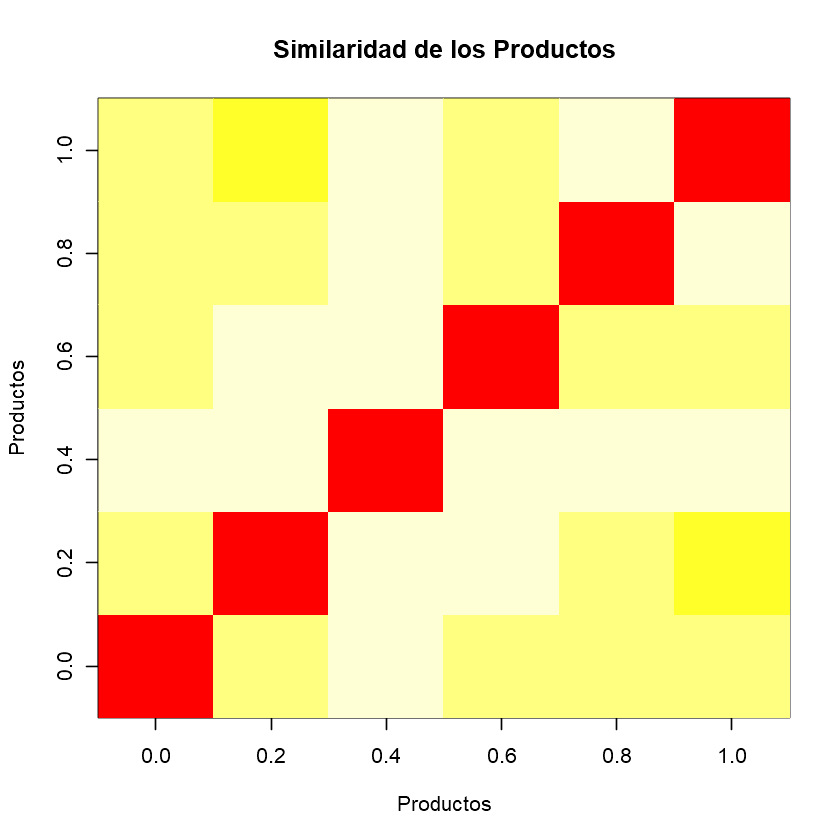

In [13]:
# Sirve par sacar un mapa de calor de la matriz de similaridad de los productos
image(as.matrix(similarity_items), main = "Similaridad de los Productos", xlab="Productos", ylab="Productos")

# Conclusión: Este gráfico se analiza de la siguiente forma: 
# Entre más rojo este un cuadro significa que hay más similaridad entre los productos

# Viene del libro
# image(as.matrix(similarity_items), main = "Item similarity")

In [14]:
# El paquete tiene varios algoritmos de recomendación que son los siguientes:
modelos_recomendacion <- recommenderRegistry$get_entries(dataType ="realRatingMatrix")
names(modelos_recomendacion)

[1] "ALS_realRatingMatrix"          "ALS_implicit_realRatingMatrix"
[3] "IBCF_realRatingMatrix"         "POPULAR_realRatingMatrix"     
[5] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
[7] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[9] "UBCF_realRatingMatrix"

In [15]:
# Sirve para ver la descripción de cada algoritmo de recomendación
lapply(modelos_recomendacion, "[[", "description")

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

In [16]:
# Sirve para ver los parámetros de cada algoritmo de recomendación
modelos_recomendacion$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [17]:
# Sirve para ver las dimensiones de los datos esto quiere decir cantidad de Usiarios, cantidad de productos
dim(sr)

[1]  23 147

In [18]:
# Sirve para crear un vector de calificaciones
 vector_ratings <- as.vector(sr@data)
 unique(vector_ratings)

# Viene del libro
# vector_ratings <- as.vector(MovieLense@data)
# unique(vector_ratings)

[1] 3 0 5 2 1 4

In [19]:
# Sirve para crear una tabla de frecuencias con las calificaciones de los productos
 table_ratings <- table(vector_ratings)
 table_ratings

# Viene del libro
# table_ratings <- table(vector_ratings)
# table_ratings

vector_ratings
   0    1    2    3    4    5 
2570  149  174  167  163  158 

In [20]:
# Sirve para sacar las frecuencias de las calificaciones de los productos
vector_ratings <- vector_ratings[vector_ratings != 0]
vector_ratings <- factor(vector_ratings)


# Viene del libro
# vector_ratings <- vector_ratings[vector_ratings != 0]
# vector_ratings <- factor(vector_ratings)

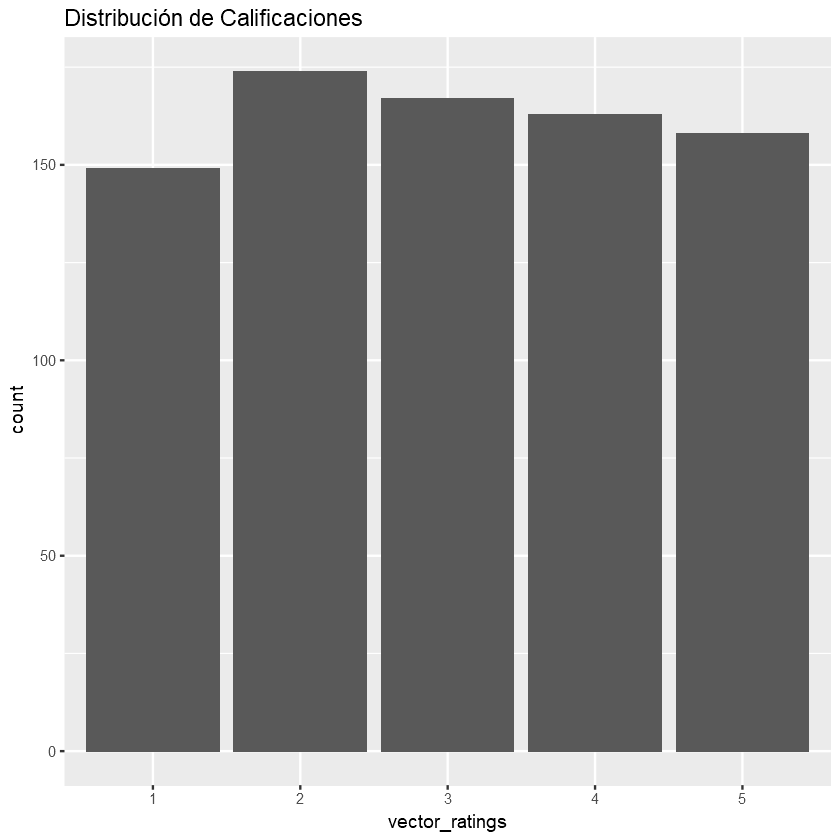

In [21]:
# Sirve para hallar la distribución de frecuencias de las calificaciones de los productos
 qplot(vector_ratings) + ggtitle("Distribución de Calificaciones") 

# Viene del libro
# qplot(vector_ratings) + ggtitle("Distribution of the ratings")

In [22]:
# Sirve para saber que prodcutos han sido más calificados
 views_per_prod <- colCounts(sr)
 table_views <- data.frame(producto = names(views_per_prod), vistas = views_per_prod)
 table_views <- table_views[order(table_views$vistas, decreasing = TRUE), ]
 table_views

# Viene del libro
# views_per_movie <- colCounts(MovieLense)
# table_views <- data.frame(movie = names(views_per_movie),views = views_per_movie)
# table_views <- table_views[order(table_views$views, decreasing = TRUE), ]

,producto,vistas
B000CPGYTY,B000CPGYTY,20
B000IDSLOG,B000IDSLOG,20
B000CSBP9K,B000CSBP9K,19
B000EDJ1A8,B000EDJ1A8,19
B000GB0NZK,B000GB0NZK,19
B000GJIE4E,B000GJIE4E,19
B000GOUUR8,B000GOUUR8,19
B000I2MRHO,B000I2MRHO,19
B000I2MRLK,B000I2MRLK,19
B000JM4R8U,B000JM4R8U,19


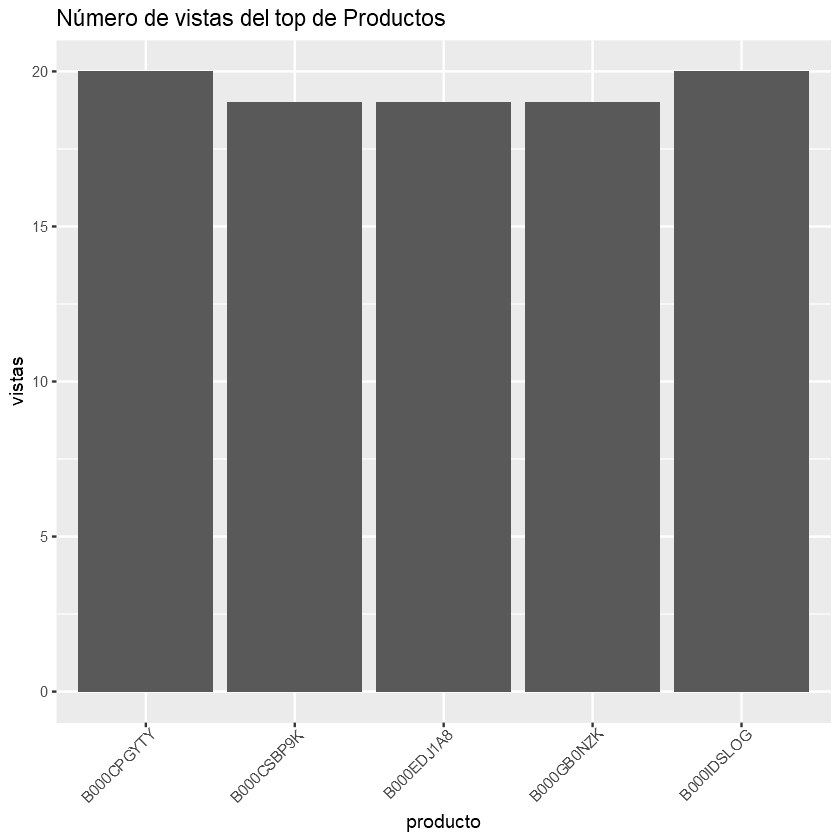

In [23]:
# Sirve para generar el gráfico de los productos más calificados
ggplot(table_views[1:5, ], aes(x = producto, y = vistas)) + geom_bar(stat="identity") + theme(axis.text.x =
 element_text(angle = 45, hjust = 1)) + ggtitle("Número de vistas del top de Productos")

# Viene del libro
# ggplot(table_views[1:6, ], aes(x = movie, y = views)) + geom_bar(stat="identity") + theme(axis.text.x =
# element_text(angle = 45, hjust = 1)) + ggtitle("Number of views of the top movies")

In [24]:
# Sirve para sacar el promedio de calificaciones de los productos
average_ratings <- colMeans(sr)
average_ratings


# Viene del libro
# average_ratings <- colMeans(MovieLense)

B000056J76 B000056OV0 B00005BMDX B00005JIVI B00006966I B00008ODBG B00009QMQV 
  3.714286   2.571429   3.000000   3.142857   2.625000   2.727273   3.363636 
B0001D12XA B0001YIB1A B00029TCQM B0002HYCMI B00063EDEK B0007KMUH4 B00081J3N6 
  2.818182   2.727273   2.454545   2.909091   2.363636   3.272727   2.923077 
B0009RG8WS B000A88JZA B000BNQC58 B000BVKPNA B000CCEWBY B000COY136 B000CPGYTY 
  2.857143   2.666667   2.375000   2.944444   3.055556   3.166667   3.200000 
B000CSBP9K B000EDJ1A8 B000GB0NZK B000GJIE4E B000GOUUR8 B000I2MRHO B000I2MRLK 
  2.684211   2.894737   2.473684   3.105263   3.157895   2.684211   3.000000 
B000IDSLOG B000JM4R8U B000JPQFH8 B000K50780 B000K53U7K B000KJZOWU B000KPZLSG 
  3.250000   3.894737   3.421053   3.000000   3.052632   2.722222   3.333333 
B000KW3ZE6 B000LXQVA4 B000M432IG B000M49MO4 B000M5HZ8I B000N9H4SE B000NSBBIY 
  3.052632   2.631579   3.222222   3.333333   3.866667   2.857143   3.384615 
B000R9YXWA B000RFAAEO B000RFCXIK B000RHJT6C B000RHWN42 B000RZNJII B000TFMIMY 
  3.307692   3.153846   2.250000   2.100000   3.444444   3.333333   2.857143 
B000TILSOU B002QYW8LW B002QZ64T8 B002R2BFVM B002SG7JSU B002SW3C7G B002TOKHGC 
  3.142857   5.000000   1.000000   2.000000   5.000000   1.000000   5.000000 
B002UD65PY B002UD65ZE B002UD660S B002UXQRLG B002UXQRMU B002V92ZJC B002VA2UFA 
  1.000000   1.000000   1.000000   2.000000   1.000000   2.000000   1.000000 
B002WN2B78 B002WN2BY6 B00318CLUK B00318CLVE B0034UGFB6 B0035LLG2W B0035LQNNE 
  4.000000   3.000000   2.000000   1.000000   2.000000   5.000000   3.000000 
B0038JDUPC B0038JDVBK B0038W0JHG B003AJXY10 B003AM8CL4 B003BGTDDK B003BIFOGS 
  5.000000   5.000000   4.000000   2.000000   5.000000   3.000000   2.000000 
B003BL1HIE B003DML8W6 B003FGWA8G B003H39L9S B003HIXXBU B003I867Z8 B003LPUPVU 
  4.000000   5.000000   2.000000   1.000000   3.000000   5.000000   3.000000 
B003LZDB4S B003N0JXNO B003TJAGAS B003TXVY14 B003TXZWOY B003U9V18S B003UPDVG2 
  4.000000   2.000000   2.000000   2.000000   2.000000   1.000000   1.000000 
B003VLG4PK B003Z6Q3V6 B003ZFPRHS B003ZUXBBC B0040JZ4VC B0042D69WY B0042MEQ7A 
  5.000000   2.000000   3.000000   2.000000   3.000000   2.000000   5.000000 
B00450SPSA B0047EBM9I B004B762AK B004BJ0SN0 B004C053CY B004CSNG6G B004DC9TA8 
  3.000000   4.000000   4.000000   5.000000   3.000000   3.000000   4.000000 
B004DFO57M B004ECJWK4 B004GB5UO0 B004GCJMLG B004I110D8 B004IEBU5I B004KT82AM 
  5.000000   2.000000   3.000000   3.000000   2.000000   4.000000   1.000000 
B004L2JJAK B004QZBE8M B004X8K46A B00511J6IA B0052QOKWQ B0056S8AGW B0057ONXG2 
  4.000000   3.000000   4.000000   3.000000   5.000000   5.000000   5.000000 
B005EDBWOQ B005KMK670 B005L4NIRC B005MM7FA4 B005MQR7GW B005OI8O88 B005SPCXKC 
  2.000000   5.000000   3.000000   5.000000   1.000000   1.000000   4.000000 
B006I18WQE B006I1ZMJ4 B006P05S42 B006UY170M B0072FREFA B0076NYZBE B00792RG1S 
  3.000000   1.000000   4.000000   4.000000   5.000000   2.000000   3.000000 
B007HZBOFG B007JVI94M B00846FJ0S B00856QSL6 B008BU4NVI B008WNV4J8 B008XLU8OQ 
  3.000000   2.000000   3.000000   5.000000   4.000000   3.000000   3.000000 
B0098PUNGO B00A7W0VLY B00B507D7C B00B99DSQ4 B00BJCO94G B00BQYVQWU B00F7PXALO 
  5.000000   3.000000   2.000000   4.000000   2.000000   5.000000   2.000000

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


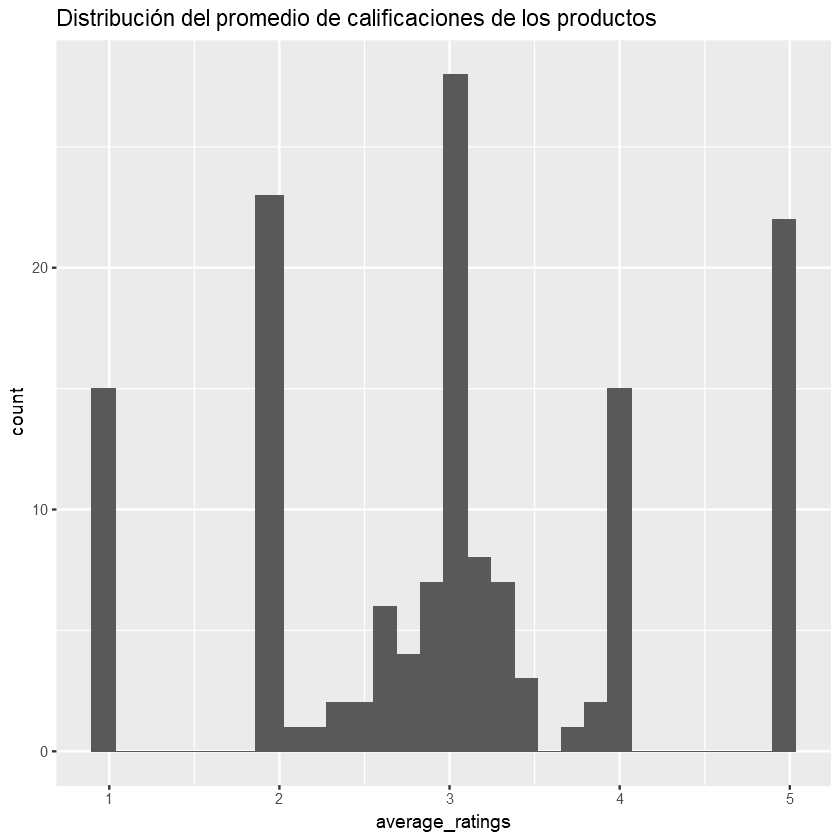

In [25]:
# Sirve para sacar el gráfico de distribución del promedio de calificaciones de los productos
qplot(average_ratings) + stat_bin(binwidth = 0.05) + 
ggtitle("Distribución del promedio de calificaciones de los productos")
options(warn=-1)

# Viene del libro
# qplot(average_ratings) + stat_bin(binwidth = 0.1) + ggtitle("Distribution of the average movie rating")

In [26]:
# Promedio de la calificación de los productos más calificados 
average_ratings_relevant <- average_ratings[views_per_prod > 8]
average_ratings_relevant

# Viene del libro
# average_ratings_relevant <- average_ratings[views_per_movie > 100]

B00008ODBG B00009QMQV B0001D12XA B0001YIB1A B00029TCQM B0002HYCMI B00063EDEK 
  2.727273   3.363636   2.818182   2.727273   2.454545   2.909091   2.363636 
B0007KMUH4 B00081J3N6 B0009RG8WS B000A88JZA B000BNQC58 B000BVKPNA B000CCEWBY 
  3.272727   2.923077   2.857143   2.666667   2.375000   2.944444   3.055556 
B000COY136 B000CPGYTY B000CSBP9K B000EDJ1A8 B000GB0NZK B000GJIE4E B000GOUUR8 
  3.166667   3.200000   2.684211   2.894737   2.473684   3.105263   3.157895 
B000I2MRHO B000I2MRLK B000IDSLOG B000JM4R8U B000JPQFH8 B000K50780 B000K53U7K 
  2.684211   3.000000   3.250000   3.894737   3.421053   3.000000   3.052632 
B000KJZOWU B000KPZLSG B000KW3ZE6 B000LXQVA4 B000M432IG B000M49MO4 B000M5HZ8I 
  2.722222   3.333333   3.052632   2.631579   3.222222   3.333333   3.866667 
B000N9H4SE B000NSBBIY B000R9YXWA B000RFAAEO B000RFCXIK B000RHJT6C B000RHWN42 
  2.857143   3.384615   3.307692   3.153846   2.250000   2.100000   3.444444 
B000RZNJII 
  3.333333

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


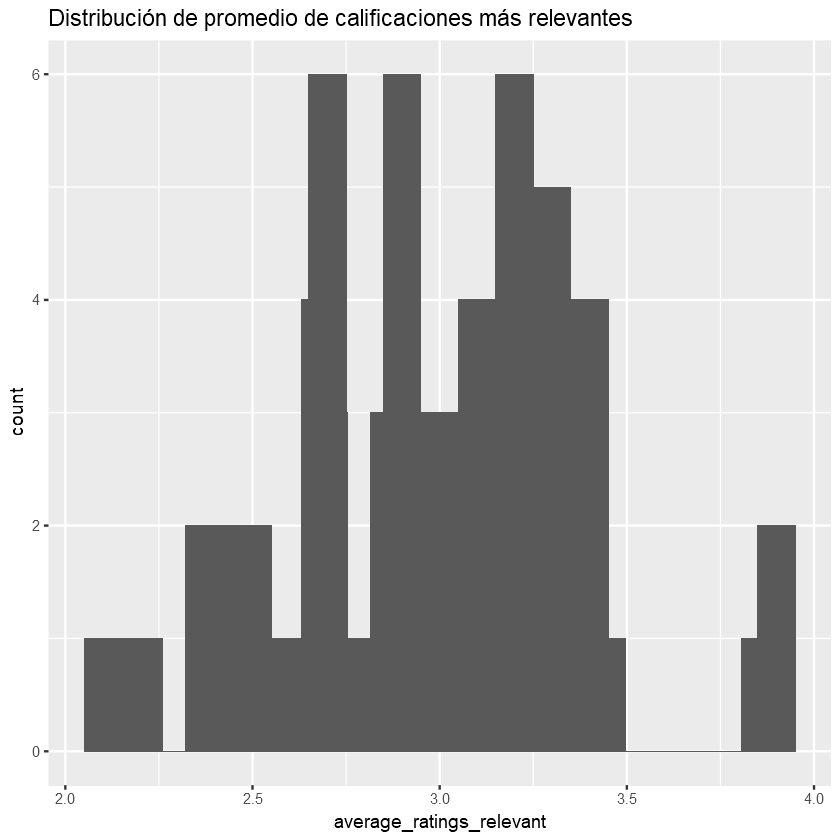

In [27]:
# Sirve para sacar el gráfico de distribución del promedio de las calificaciones de los productos más calificados
qplot(average_ratings_relevant) + stat_bin(binwidth = 0.1) +
ggtitle(paste("Distribución de promedio de calificaciones más relevantes"))

# Viene del libro
# qplot(average_ratings_relevant) + stat_bin(binwidth = 0.1) + ggtitle(paste("Distribution of the relevant average ratings"))

In [28]:
# Sirve para sacar la siguiente información:
# Número mínimo de productos por usuario
# Número mínimo de usuarios por productos
min_n_product <- quantile(rowCounts(sr), 0.80)
min_n_product
min_n_users <- quantile(colCounts(sr), 0.80)
min_n_users

# Viene del libro
# min_n_movies <- quantile(rowCounts(MovieLense), 0.99)
# min_n_users <- quantile(colCounts(MovieLense), 0.99)
# min_n_movies
# min_n_users

80% 
44.2

80% 
 13

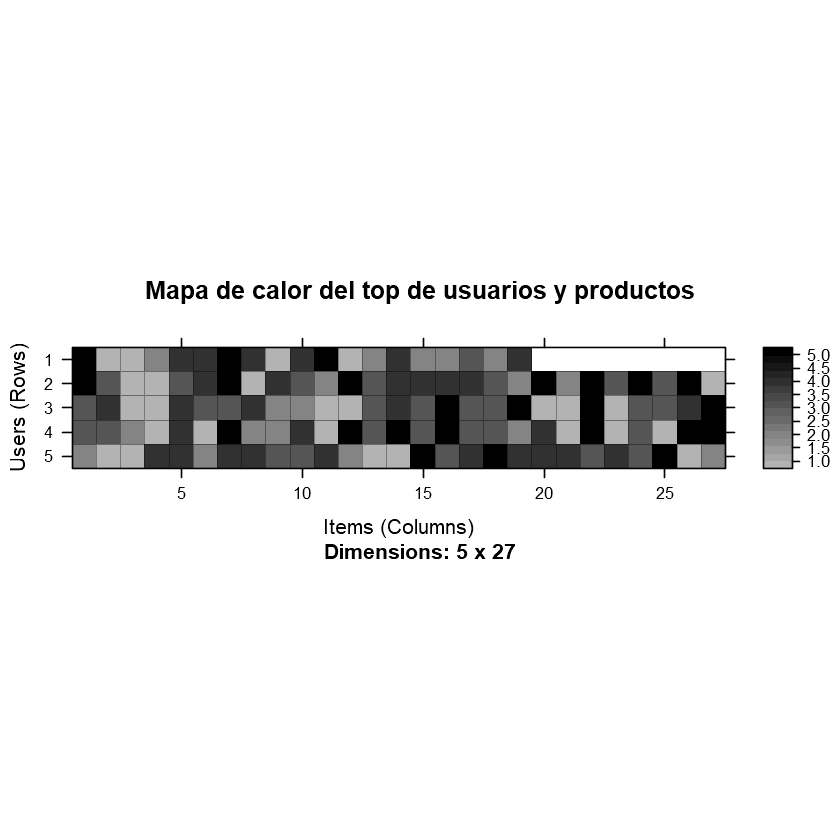

In [29]:
# Sirve para sacar un gráfico de calor con el top de usuarios y productos
image(sr[rowCounts(sr) > min_n_product, colCounts(sr) > min_n_users], main = "Mapa de calor del top de usuarios y productos")

# Viene del libro
# image(MovieLense[rowCounts(MovieLense) > min_n_movies,colCounts(MovieLense) > min_n_users], main = "Heatmap of the top users
# and movies")

In [30]:
# Sirve para sacar el conjunto de datos más calificado
ratings_product <- sr[rowCounts(sr) > 3, colCounts(sr) > 3] 
ratings_product

# Viene del libro
# ratings_movies <- MovieLense[rowCounts(MovieLense) > 50,colCounts(MovieLense) > 100] ratings_movies

23 x 50 rating matrix of class 'realRatingMatrix' with 714 ratings.

In [31]:
# Sirve para crear una muestra alatoria para generar el conjunto de entrenamiento y de prueba del modelo
which_train <- sample(x = c(TRUE, FALSE), size = nrow(ratings_product),replace = TRUE, prob = c(0.6, 0.4))
head(which_train)


# Viene del libro 
# which_train <- sample(x = c(TRUE, FALSE), size = nrow(ratings_movies),replace = TRUE, prob = c(0.8, 0.2))
# head(which_train)

[1]  TRUE FALSE FALSE FALSE  TRUE  TRUE

In [32]:
# Sirve para crear el conjunto de entrenamiento y de prueba con la muestra aleatoria antes creada
recc_data_train <- ratings_product[which_train, ]
recc_data_test <- ratings_product[!which_train, ]

# Viene del libro
# recc_data_train <- ratings_movies[which_train, ]
# recc_data_test <- ratings_movies[!which_train, ]

In [33]:
# Sirve para construir la recomendación generando muestras aleatorias de los conjuntos de entrenamiento y prubea.
which_set <- sample(x = 1:5, size = nrow(ratings_product), replace = TRUE)
for(i_model in 1:5) {
    which_train <- which_set == i_model
    recc_data_train <- ratings_product[which_train, ]
    recc_data_test <- ratings_product[!which_train, ]
# build the recommender
}

# Viene del libro
#which_set <- sample(x = 1:5, size = nrow(ratings_movies), replace = TRUE)
#for(i_model in 1:5) {
#which_train <- which_set == i_model
#recc_data_train <- ratings_movies[which_train, ]
#recc_data_test <- ratings_movies[!which_train, ]
# build the recommender
#}

In [34]:
# Sirve para entrenar el modelo de recomendación usando el algoritmo IBCF que es del K-Vecino más cercano
recc_model <- Recommender(data = recc_data_train, method = "IBCF", parameter = list(k = 4))
recc_model

# Viene del libro
# recc_model <- Recommender(data = recc_data_train, method = "IBCF", parameter = list(k = 30))
# recc_model

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 7 users.

In [35]:
# Sirve para aplicar la recomendación a los clientes del conjunto de prueba
n_recommended <- 6
recc_predicted <- predict(object = recc_model, newdata = recc_data_test, n = n_recommended)
recc_predicted

# Viene del libro
# n_recommended <- 6
# recc_predicted <- predict(object = recc_model, newdata = recc_data_test, n = n_recommended)
# recc_predicted

Recommendations as 'topNList' with n = 6 for 16 users. 

In [36]:
# Sirve para ver los indices de los productos recomendados al primer usuario
recc_predicted@items[[1]]

# Viene del libro
# recc_predicted@items[[1]]

[1] 41 46 36 37 38 39

In [37]:
# Sirve para extraer los productos recomendados al primer usuario
recc_user_1 <- recc_predicted@items[[1]]
product_user_1 <- recc_predicted@itemLabels[recc_user_1]
product_user_1

# Viene del libro
# recc_user_1 <- recc_predicted@items[[1]]
# movies_user_1 <- recc_predicted@itemLabels[recc_user_1]
# movies_user_1

[1] "B000N9H4SE" "B000RHJT6C" "B000KW3ZE6" "B000LXQVA4" "B000M432IG"
[6] "B000M49MO4"

In [38]:
# Sirve para definir la matriz de recomendación para cada usuario
recc_matrix <- sapply(recc_predicted@items, function(x){
    colnames(ratings_product)[x]
})
as.matrix(recc_matrix)

# Viene del libro
#recc_matrix <- sapply(recc_predicted@items, function(x){
#    colnames(ratings_movies)[x]
#})
# dim(recc_matrix)

06abj05,"B000N9H4SE, B000RHJT6C, B000KW3ZE6, B000LXQVA4, B000M432IG, B000M49MO4"
06abj07,"B000A88JZA, B000COY136, B000CCEWBY, B0009RG8WS, B000056J76, B000056OV0"
102Riley102riley,"B000056J76, B000056OV0, B00005BMDX, B00005JIVI, B000RFCXIK, B000RZNJII"
19WizardofOz,"B000CSBP9K, B000RHWN42, B000EDJ1A8, B000GB0NZK, B000GJIE4E, B000GOUUR8"
1Mom,"B0009RG8WS, B000BNQC58, B000CPGYTY, B000I2MRHO, B000IDSLOG, B000JM4R8U"
1sam127,B000RHWN42
1sttimeMom,"B0009RG8WS, B000056J76, B000056OV0, B00005BMDX, B00005JIVI, B00006966I"
1stTimeMommy2B,"B000RHWN42, B000RHJT6C, B000RZNJII, B000TFMIMY, B000TILSOU"
2010NewMom,"B0009RG8WS, B000RHJT6C, B000056J76, B000056OV0, B00005BMDX, B00005JIVI"
20BIGRED02,"B0009RG8WS, B000RHWN42, B000BVKPNA, B000BNQC58, B000056J76, B000056OV0"
2boys_and_a_mom,"B000056J76, B000056OV0, B00005BMDX, B00005JIVI, B00006966I, B000BVKPNA"


In [39]:
# Siver para ver la recomendación de los primeros 4 usuarios
as.matrix(recc_matrix)[1:4,]

# Viene del libro
# recc_matrix[, 1:4]

$`06abj05`
[1] "B000N9H4SE" "B000RHJT6C" "B000KW3ZE6" "B000LXQVA4" "B000M432IG"
[6] "B000M49MO4"

$`06abj07`
[1] "B000A88JZA" "B000COY136" "B000CCEWBY" "B0009RG8WS" "B000056J76"
[6] "B000056OV0"

$`102Riley102riley`
[1] "B000056J76" "B000056OV0" "B00005BMDX" "B00005JIVI" "B000RFCXIK"
[6] "B000RZNJII"

$`19WizardofOz`
[1] "B000CSBP9K" "B000RHWN42" "B000EDJ1A8" "B000GB0NZK" "B000GJIE4E"
[6] "B000GOUUR8"

5. Conclusión de las recomendaciones
==

* A los clientes que no calificaron algunos productos, se les hizo una predicción sobre que productos calificarán proximamente, basado en sus vecinos más cercanos.

* Ejemplo el sujeto **06abj05** calificará los productos **'B00RZnJII', 'B000RHJT6C' 'B000NSBBIY' 'B000TFMIMY' 'B000TILSOU' 'B000RHWN42'** proximamente según la recomendación que dio el algoritmo.

* En la exploración encontramos que los datos tienen que tener una relación tanto en productos como usuarios que califican los mismos productos, ya que las métricas y la matriz de similaridad depende de ello para ser calculadas.



6. Referencias bibliográficas
==

* El análisis se hizo con el paquete de R (recommenderlab) cuyo libro base es (Building a Recommendation System with R [Usuelli, Gorakala - 2015]).